## 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회

1. 배경


안녕하세요 여러분! 🙌 신용카드 사용자 연체 예측 AI 경진대회에 오신 것을 환영합니다. 



신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정합니다. 

신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측합니다. 

현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현하고자 합니다. 



신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측할 수 있는 

인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴해주세요!


2. 목적


신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

3. 변수 설명

* index
* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류
		['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

* edu_type: 교육 수준
		['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

* family_type: 결혼 여부
		['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

* house_type: 생활 방식
		['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

* DAYS_BIRTH: 출생일
		데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

* DAYS_EMPLOYED: 업무 시작일
		데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

		양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부
* work_phone: 업무용 전화 소유 여부
* phone: 전화 소유 여부
* email: 이메일 소유 여부
* occyp_type: 직업 유형													
* family_size: 가족 규모
* begin_month: 신용카드 발급 월
		데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
		낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
# pandas, numpy, matplotlib.pyplot, seaborn, os 등 필요 라이브러리 호출

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모든 행을 출력
pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/test.csv')

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

* Categorical Data

  * gender
  * car
  * reality
  * income_type
  * edu_type
  * family_type
  * house_type
  * occyp_type

* Continuous Data
  * index
  * income_type
  * DAYS_BIRTH
  * DAYS_EMPLOYED
  * FLAG_MOBIL
  * work_phone
  * phone
  * email
  * family_size
  * begin_month
  * credit

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

* occyp_type : 결측치

In [ ]:
train['occyp_type'] = train['occyp_type'].fillna('NaN')
test['occyp_type'] = test['occyp_type'].fillna('NaN')

In [ ]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train['index'].value_counts()

0        1
17635    1
17645    1
17644    1
17643    1
        ..
8816     1
8815     1
8814     1
8813     1
26456    1
Name: index, Length: 26457, dtype: int64

* FLAG_MOBIL : 모든 값이 1로 수렴, 피처 삭제
* index : 모든데이터 값이 0 ~ 26356의 하나씩의 값을 다 가짐, 피처 삭제
* child_num : 자녀의 수의 평균 0.42 / max : 19의 값 '이상치', 이상치 확인
* DAYS_EMPLOYED : 양수 값은 고용되지 않은 상태를 의미함 고용되지 않은 값 : 0으로 변경
* family_size : 가구 구성원 수의 평균 2.1 / max : 20의 값 '이상치' 이상치 확인
* credit : 0, 1, 2의 값을 가지지만 평균 1.5 따라서 2의 분포가 더 많을 것으로 판단

In [ ]:
train.describe(include = 'O')

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,26457
unique,2,2,2,5,5,5,6,19
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,NaN
freq,17697,16410,17830,13645,17995,18196,23653,8171


* Gender(성별) : unique의 개수 2개, Female의 비율이 많다.
* Car(차량 소지) : unique의 개수 2개, N의 비율이 많다.
* reality(부동산 소지) : unique의 개수 2개, Y의 비율이 많다.

1. 연령 (Age): DAYS_BIRTH를 이용하여 계산

2. 근속 기간 (Employment duration): DAYS_EMPLOYED를 이용하여 계산

3. 신용카드 사용 기간 (Credit card usage duration): 현재 월(begin_month)에서 카드 발급 월을 뺀 값

### 데이터 클랜징

* **컬럼 제거 : 'FLAG_MOBIL', 'index'**

In [ ]:
train.drop(['FLAG_MOBIL','index'], axis = 1, inplace = True)
test.drop(['FLAG_MOBIL','index'], axis = 1, inplace = True)

* **child_num : 자녀의 수의 평균 0.42 / max : 19의 값 '이상치', 이상치 확인**

In [ ]:
train.sort_values('child_num', ascending = False).head(20)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-7.0,2.0
25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-43.0,2.0
9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-58.0,2.0
25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,Cleaning staff,9.0,-26.0,2.0
25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,Cleaning staff,9.0,-31.0,2.0
10321,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,0,0,0,Managers,7.0,-46.0,0.0
20117,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,0,0,0,Laborers,7.0,-21.0,1.0
17978,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,0,0,0,Managers,7.0,-21.0,1.0
17560,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,0,0,0,Laborers,7.0,-20.0,1.0


In [ ]:
# 숫자형 변수 단변량 분석 함수

def eda_1_n(var, data) :

    #기초통계량 (데이터프레임 형태)
    display(train[[var]].describe().T)  

    #시각화
    plt.figure(figsize = (12, 8))  # 그래프 크기 조절
    plt.subplot(2, 1, 1)  # 2행 1열로 1번째 그래프
    sns.histplot(x = var, data = data, kde = True)
    plt.grid()

    plt.subplot(2, 1, 2) # 2행 1열로 2번째 그래프
    sns.boxplot(x = var , data = data)
    plt.grid()  # 격자 추가

    plt.show()  # 그래프 print


,count,mean,std,min,25%,50%,75%,max
child_num,26457.0,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0


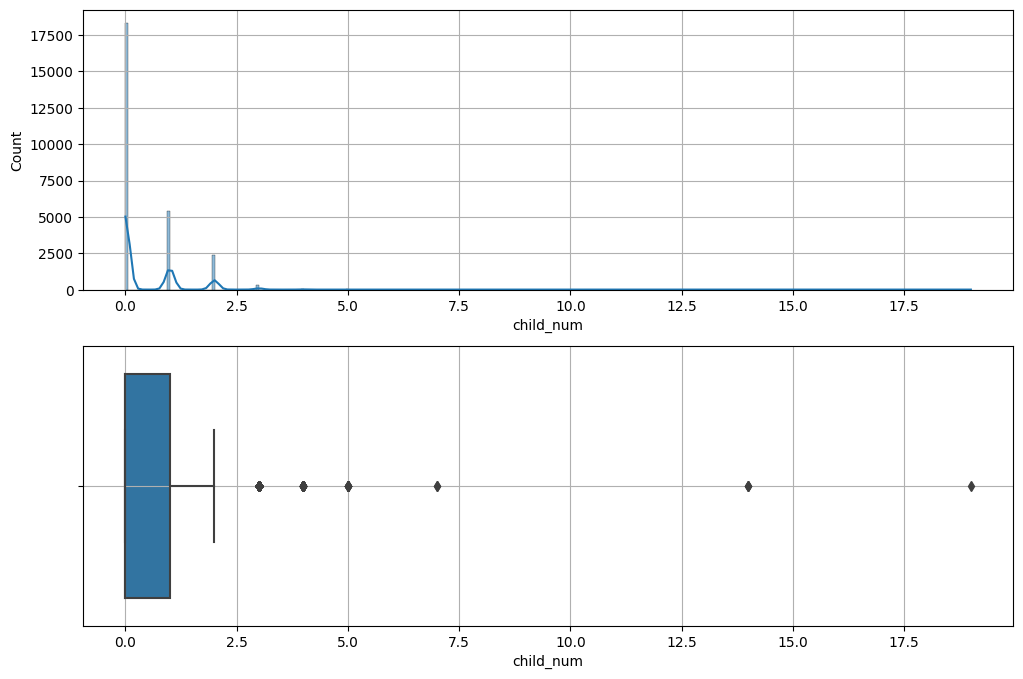

In [ ]:
eda_1_n('child_num', train)

In [ ]:
train = train[train['child_num'] < 4]

,count,mean,std,min,25%,50%,75%,max
child_num,26394.0,0.417822,0.701289,0.0,0.0,0.0,1.0,3.0


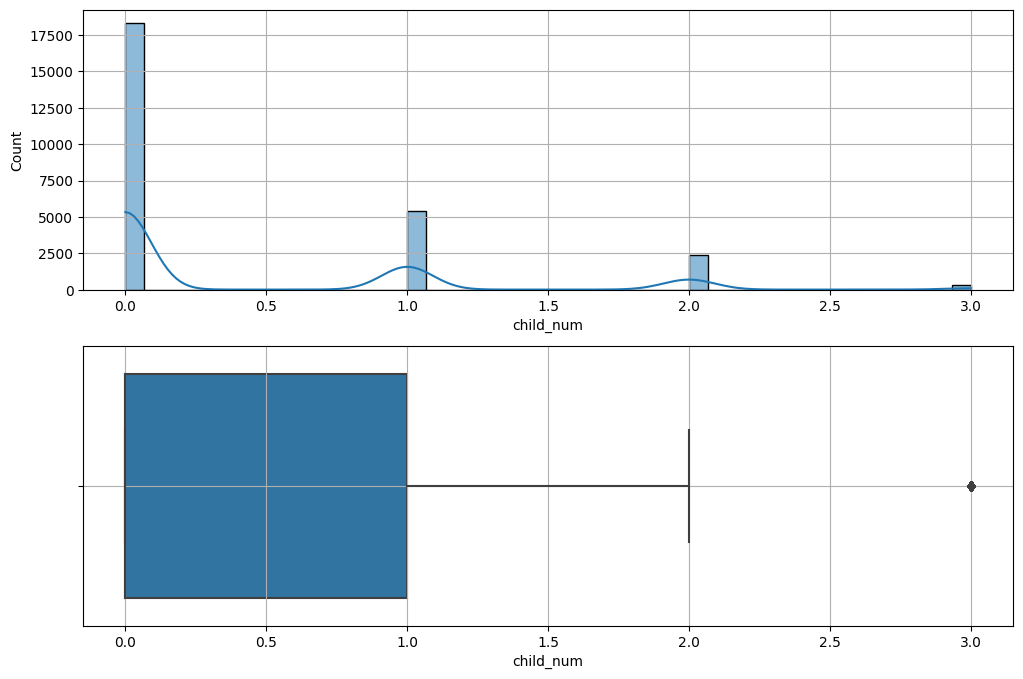

In [ ]:
eda_1_n('child_num', train)

* child_num의 값이 가장 큰 데이터 : 19명의 아이를 가지고 있지만 결혼을 하지 않음 > 입양에 관한 내용인진 모르겠지만 이상치로 처리

* child_num의 값 = 14 : 3개의 값을 가지고 있는데 카드 발급일(begin_month)에 대한 값을 제외하고 동일한 것을 확인 할 수 있음 

* child_num의 값 = 7 : 2개의 값을 가지고 있는데 카드 발급일(begin_month)에 대한 값을 제외하고 동일한 것을 확인 할 수 있음

> child_num : 자녀 수의 이상치는 2.5 ~ 부터 나타나는 것으로 파악 > 우선적으로 4명 이상의 아이에 대해서 제거하고 분석 진행

> 카드 발급일(begin_month)에 대한 값을 제외하고 동일한 것을 확인 할 수 있음, 이 값에 대해서 처리를 어떻게 해야하는지 분석 진행

* **DAYS_EMPLOYED : 고용일에 대한 클랜징 진행**
  * 0보다 큰 값은 0으로 변경

In [ ]:
train[train['DAYS_EMPLOYED'] >= 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,0,1,0,NaN,1.0,-41.0,2.0
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,0,0,0,NaN,2.0,-37.0,2.0
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,0,1,0,NaN,2.0,-7.0,2.0
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,0,1,0,NaN,1.0,-5.0,2.0
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,0,0,1,NaN,1.0,-60.0,1.0
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,0,1,0,NaN,2.0,-17.0,1.0
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,0,0,0,NaN,2.0,-57.0,2.0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,0,0,0,NaN,1.0,-43.0,2.0


In [ ]:
train[train['DAYS_EMPLOYED'] >= 0]['DAYS_EMPLOYED'].nunique()

1

In [ ]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243 : 0})
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243 : 0})

In [ ]:
train[train['DAYS_EMPLOYED'] > 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit


* 0보다 큰 값들은 모두 1개의 값이며, 그 값은 '365243'안 것을 확인 할 수 있음 > 0으로 변경

* **parents_num : 가구 구성원 수의 평균 2.1 / max : 20의 값 '이상치' 이상치 확인**

In [ ]:
train['parents_num'] = train['family_size'] - train['child_num']
test['parents_num'] = test['family_size'] - test['child_num']

In [ ]:
train['parents_num'].unique()

array([ 2.,  1.,  0., -1.])

In [ ]:
train[train['parents_num'].isin([0,-1])]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,parents_num
5825,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173,-678,0,1,1,Core staff,1.0,-16.0,2.0,0.0
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,0,0,0,Drivers,1.0,-30.0,2.0,-1.0
16110,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12723,-1132,1,1,0,Sales staff,1.0,-48.0,2.0,0.0
16791,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,-779,0,0,0,Core staff,1.0,-37.0,2.0,0.0
18879,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755,-2105,0,0,0,NaN,1.0,-39.0,2.0,0.0
21096,M,N,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16424,-1458,0,0,0,Drivers,1.0,-25.0,2.0,0.0


* family_child의 열을 봤을 때, 가족 구성원 : 자녀의 수 + 부모의 수 

* 따라서 가족 구성원 수에서 아이의 수를 뻈을 때, 0이나 -1이 나올 수 없다.

In [ ]:
train = train[train['parents_num'] > 0]

In [ ]:
train.sort_values('parents_num', ascending = False).head(20)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,parents_num
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,2.0
16444,F,Y,N,0,144000.0,Commercial associate,Higher education,Married,House / apartment,-16830,-3458,0,0,0,NaN,2.0,-51.0,2.0,2.0
16471,F,Y,Y,2,450000.0,Working,Secondary / secondary special,Married,House / apartment,-14874,-4693,0,0,0,Core staff,4.0,-56.0,2.0,2.0
16470,M,N,N,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-13676,-1016,1,1,0,Laborers,3.0,-3.0,1.0,2.0
16467,M,Y,N,0,207000.0,Working,Secondary / secondary special,Married,Municipal apartment,-20535,-888,0,0,0,Laborers,2.0,-6.0,2.0,2.0
16465,M,Y,N,0,202500.0,Pensioner,Higher education,Married,House / apartment,-20195,0,0,0,0,NaN,2.0,-38.0,2.0,2.0
16464,F,N,Y,2,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12563,-1025,0,0,0,Cooking staff,4.0,-5.0,0.0,2.0
16463,F,N,N,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-20875,-3785,0,0,0,High skill tech staff,2.0,-25.0,2.0,2.0
16462,F,N,Y,0,225000.0,Commercial associate,Higher education,Married,House / apartment,-9850,-246,0,0,0,NaN,2.0,-2.0,1.0,2.0
16461,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23504,0,0,0,0,NaN,2.0,-40.0,2.0,2.0


,count,mean,std,min,25%,50%,75%,max
parents_num,26388.0,1.768417,0.421852,1.0,2.0,2.0,2.0,2.0


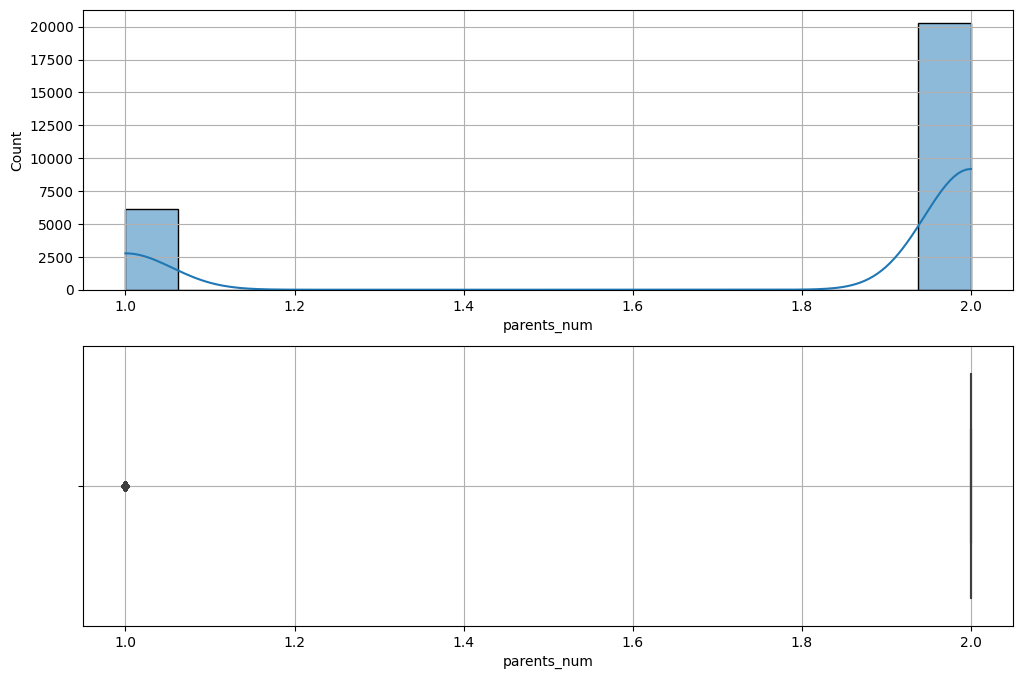

In [ ]:
eda_1_n('parents_num', train)

* 자녀의 수와 가족 구성원의 수는 관련이 있기 때문에, 자녀의 수에 대한 전처리로 인해 이상치가 줄어든 것을 확인 할 수 있다.

* **Age : 나이에 대한 계산 진행**

In [ ]:
# 음수값에 대해서 양수로 변경 / 년에 대한 값을 가지고 몫을 구한다.
train['age'] = - train['DAYS_BIRTH'] // 365
test['age'] = - test['DAYS_BIRTH'] // 365

* **Employed : 고용년수에 대한 계산**

In [ ]:
# 음수값에 대해서 양수로 변경 / 년에 대한 값을 가지고 몫을 구한다.
train['employed'] = - train['DAYS_EMPLOYED'] // 365
test['employed'] = - test['DAYS_EMPLOYED'] // 365


* **Card : 카드 발급 월수**

In [ ]:
# 음수값에 대해서 양수로 변경 
train['month_card'] = - train['begin_month']
test['month_card'] = - test['begin_month']

In [ ]:
train.reset_index(drop = True, inplace = True)

In [ ]:
object_col = []
for col in train.columns:
    if train[col].dtype == 'object':
        object_col.append(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in object_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
for i in object_col:
    le = LabelEncoder()
    le=le.fit(test[i])
    test[i]=le.transform(test[i])

In [ ]:
train = train.drop(['DAYS_BIRTH','DAYS_EMPLOYED','begin_month','parents_num'], axis = 1)
test = test.drop(['DAYS_BIRTH','DAYS_EMPLOYED','begin_month','parents_num'], axis = 1)

<Axes: >

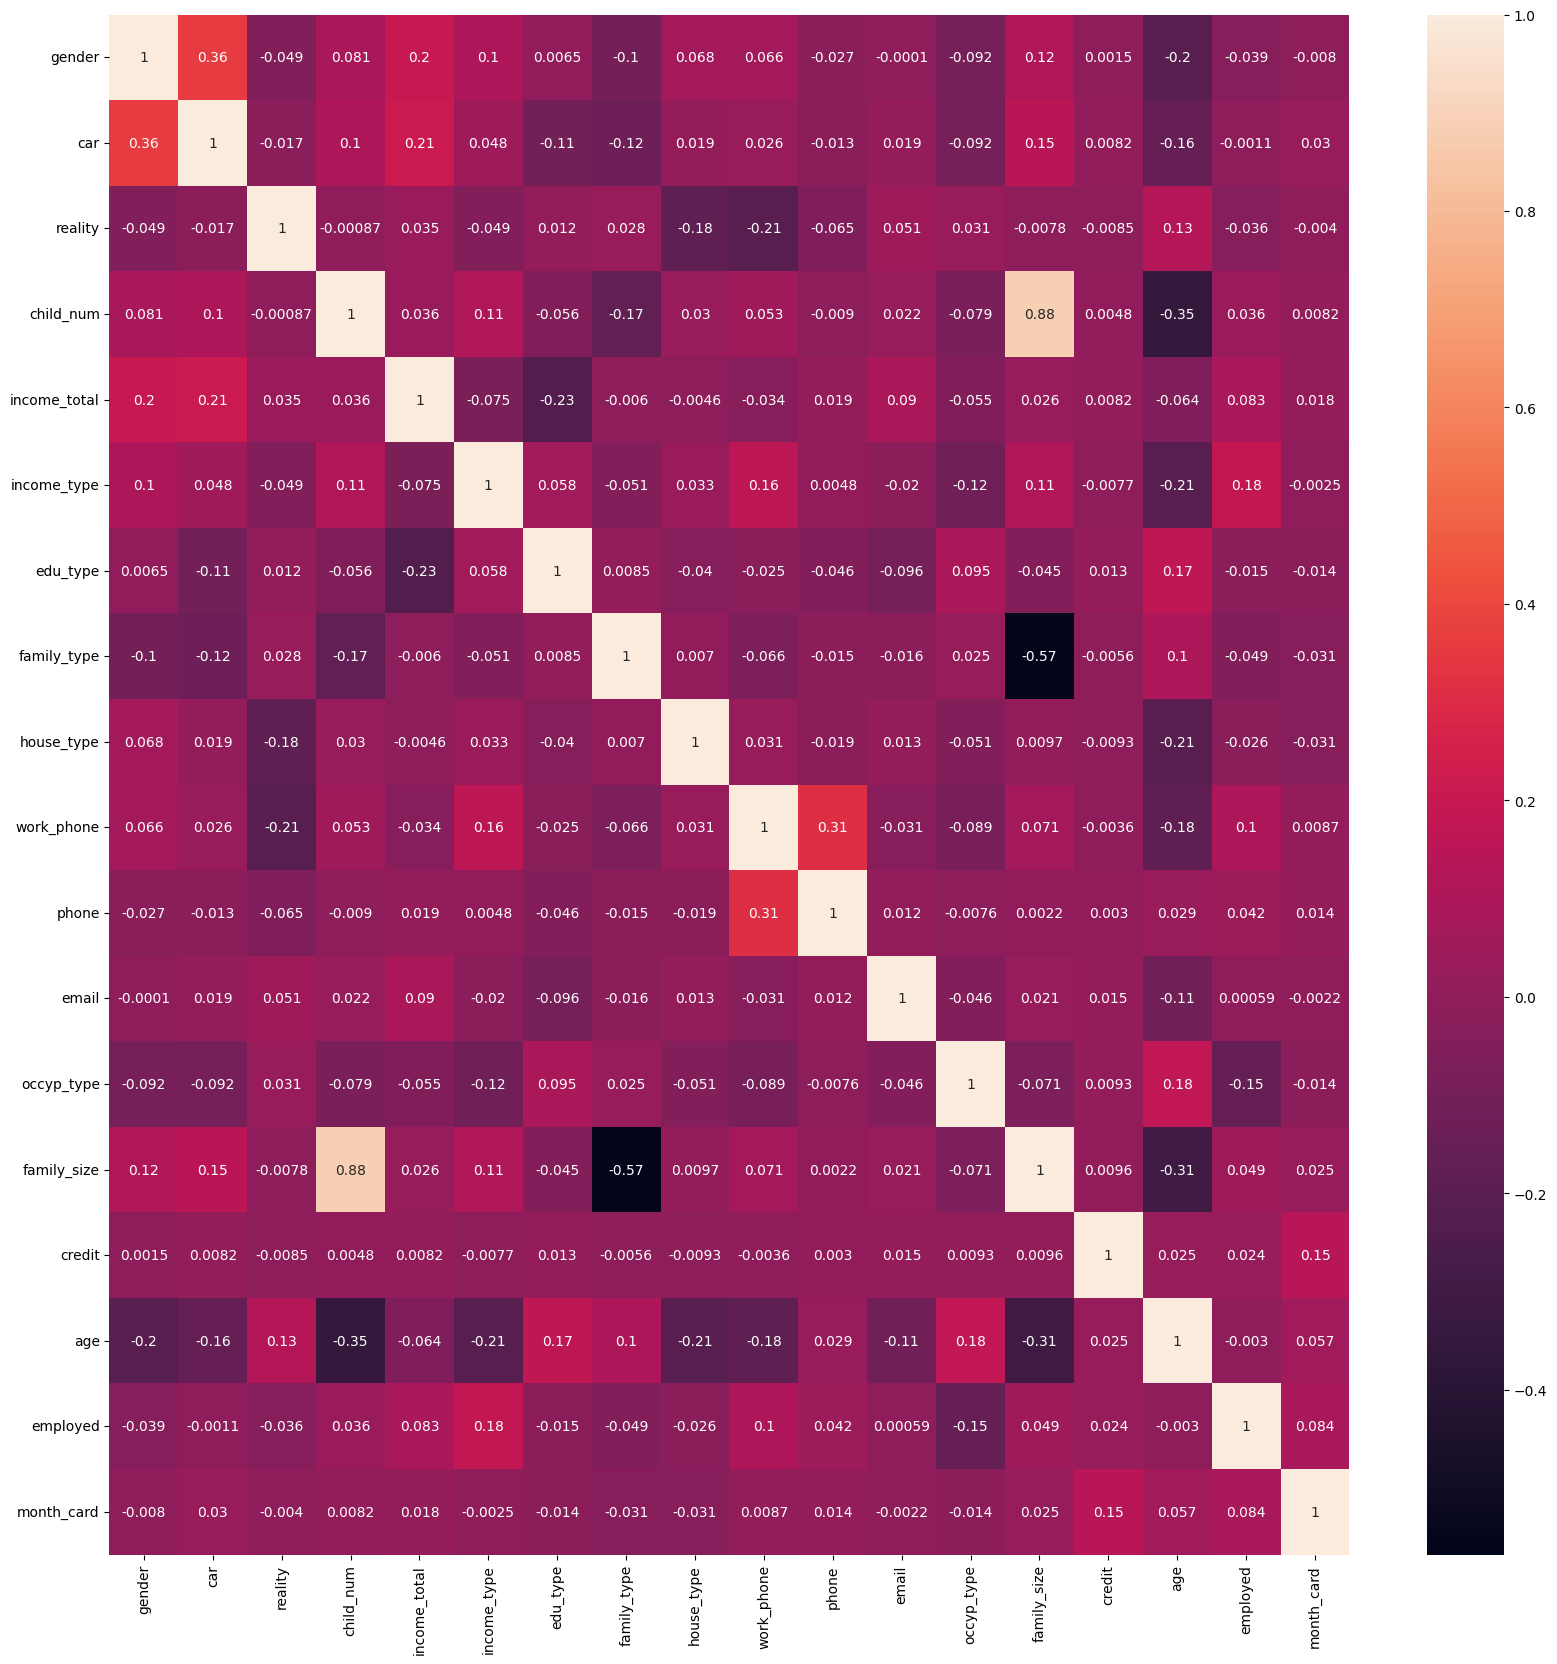

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), annot = True)

## Training

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
target = 'credit'
x_train = train.drop(target, axis = 1)
y_train = train[target]

In [ ]:
# # 학습용, 검증용 분리
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=42)

# # 평가용
# x_test = test

> 그리드 서치 진행

* lgbm : 하이퍼파라미터(colsample_bytree=0.8, max_depth=4, n_estimators=200,subsample=0.8)

* xgb : 하이퍼파라미터(colsample_bytree=1.0, learning_rate=0.1, max_depth=4,n_estimators=200)

> 스태킹 진행

마지막 모델
* randomforest : 하이퍼파라미터(n_estimators=100, max_depth=5)

In [ ]:
estimators = [
    ('lgbm', LGBMClassifier(colsample_bytree=0.8, max_depth=4, n_estimators=200,subsample=0.8)),
    ('xgb', XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=4,n_estimators=200))
]

# 스태킹 모델 정의
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, max_depth=5),
    verbose = 2
)

# 모델 학습
clf.fit(x_train, y_train)

# 모델 예측
y_pred = clf.predict_proba(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.5s finished


In [ ]:
y_pred

array([[0.08617852, 0.15831652, 0.75550496],
       [0.12475287, 0.15583353, 0.7194136 ],
       [0.13471774, 0.20430006, 0.6609822 ],
       ...,
       [0.06922179, 0.11202984, 0.81874837],
       [0.08653011, 0.1552622 , 0.75820769],
       [0.11933123, 0.22928025, 0.65138852]])

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv')

In [ ]:
submit.loc[:,1:]=y_pred
submit

<ipython-input-77-c401f947d1b2>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  submit.loc[:,1:]=y_pred


,index,0,1,2
0,26457,0.086179,0.158317,0.755505
1,26458,0.124753,0.155834,0.719414
2,26459,0.134718,0.204300,0.660982
3,26460,0.125268,0.166939,0.707793
4,26461,0.115653,0.204237,0.680110
...,...,...,...,...
9995,36452,0.125369,0.215680,0.658950
9996,36453,0.094862,0.267719,0.637419
9997,36454,0.069222,0.112030,0.818748
9998,36455,0.086530,0.155262,0.758208


In [ ]:
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv', index=False) # 0.7398  > 644등 상위 50프로정도

AUTO ML

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Pycaret
from pycaret.classification import *
from sklearn.metrics import log_loss

clf = setup(train, target = 'credit', train_size = 0.8)

,Description,Value
0,Session id,4162
1,Target,credit
2,Target type,Multiclass
3,Original data shape,"(26388, 18)"
4,Transformed data shape,"(26388, 53)"
5,Transformed train set shape,"(21110, 53)"
6,Transformed test set shape,"(5278, 53)"
7,Ordinal features,3
8,Numeric features,9
9,Categorical features,8


In [ ]:
#logloss 적용 및 predict_proba로 제출하기 위해 metric 추가
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f8971ce8160>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
#svm, ridge는 predict_proba 미지원으로 제외
best5 = compare_models(fold = 5, sort = 'logloss', n_select = 3, exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6989,0.6990,0.6989,0.6905,0.6227,0.2406,0.3233,0.7690,0.6900
xgboost,Extreme Gradient Boosting,0.6995,0.7042,0.6995,0.6755,0.6370,0.2658,0.3260,0.7723,7.1420
gbc,Gradient Boosting Classifier,0.6916,0.6494,0.6916,0.6413,0.6064,0.2101,0.2996,0.7968,4.9020
lda,Linear Discriminant Analysis,0.6430,0.6067,0.6430,0.5389,0.5098,0.0132,0.0527,0.8630,0.3360
nb,Naive Bayes,0.6485,0.6045,0.6485,0.5897,0.5186,0.0309,0.1091,0.8658,0.2580
lr,Logistic Regression,0.6414,0.5916,0.6414,0.4114,0.5013,-0.0001,-0.0018,0.8727,0.5540
dummy,Dummy Classifier,0.6414,0.5000,0.6414,0.4115,0.5013,0.0000,0.0000,0.8823,0.2020
rf,Random Forest Classifier,0.6997,0.7456,0.6997,0.6772,0.6824,0.3684,0.3753,0.9701,2.2760
ada,Ada Boost Classifier,0.6903,0.6218,0.6903,0.6230,0.6016,0.1997,0.2976,1.0807,0.9980
et,Extra Trees Classifier,0.6739,0.7096,0.6739,0.6529,0.6590,0.3217,0.3264,2.5679,2.0100


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
blended = blend_models(estimator_list = best5, fold = 10, optimize = 'logloss')
pred_holdout = predict_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.6980,0.6929,0.6980,0.6652,0.6140,0.2264,0.3222,0.7871
1,0.6923,0.6882,0.6923,0.6442,0.6046,0.2054,0.3055,0.7929
2,0.6940,0.6875,0.6940,0.6805,0.6077,0.2132,0.3096,0.7899
3,0.6947,0.6925,0.6947,0.6613,0.6096,0.2168,0.3115,0.7894
4,0.6885,0.6879,0.6885,0.7317,0.5996,0.1962,0.2902,0.7942
Mean,0.6935,0.6898,0.6935,0.6766,0.6071,0.2116,0.3078,0.7907
Std,0.0031,0.0024,0.0031,0.0299,0.0048,0.0103,0.0104,0.0026


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6925,0.6984,0.6925,0.7377,0.6056,0.2087,0.3037,0.7888


In [ ]:
#lda 와 nb는 losloss가 좋지만 accuracy, auc가 상대적으로 좋지 않아 커스텀모델 생성
custom_model = compare_models(fold = 5, sort = 'logloss', n_select = 6, include=['lightgbm','gbc','rf','ada', 'lda', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6989,0.6990,0.6989,0.6905,0.6227,0.2406,0.3233,0.7690,0.5320
gbc,Gradient Boosting Classifier,0.6916,0.6494,0.6916,0.6413,0.6064,0.2101,0.2996,0.7968,0.3620
lda,Linear Discriminant Analysis,0.6430,0.6067,0.6430,0.5389,0.5098,0.0132,0.0527,0.8630,0.2440
nb,Naive Bayes,0.6485,0.6045,0.6485,0.5897,0.5186,0.0309,0.1091,0.8658,0.2100
rf,Random Forest Classifier,0.6997,0.7456,0.6997,0.6772,0.6824,0.3684,0.3753,0.9701,0.4200
ada,Ada Boost Classifier,0.6903,0.6218,0.6903,0.6230,0.6016,0.1997,0.2976,1.0807,0.4620


Processing:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
blended_custom = blend_models(estimator_list = custom_model, fold = 5, optimize = 'logloss')
pred_holdout_custom = predict_model(blended_custom)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.7006,0.7315,0.7006,0.6296,0.6165,0.2324,0.3320,0.7860
1,0.6952,0.7305,0.6952,0.7053,0.6097,0.2159,0.3143,0.7887
2,0.6949,0.7301,0.6949,0.6226,0.6086,0.2152,0.3133,0.7883
3,0.7001,0.7416,0.7001,0.6716,0.6170,0.2321,0.3308,0.7847
4,0.6911,0.7300,0.6911,0.6145,0.6034,0.2044,0.2994,0.7893
Mean,0.6964,0.7327,0.6964,0.6487,0.6110,0.2200,0.3179,0.7874
Std,0.0036,0.0045,0.0036,0.0345,0.0051,0.0108,0.0122,0.0018


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6950,0.7432,0.6950,0.7411,0.6095,0.2163,0.3125,0.7822


## Prediction

In [ ]:
#자동으로 상위 5개 선택한 모델
final_model = finalize_model(blended)

#Accurary, AUC, Logloss 셋다 상위 4개인 모델 
final_model_custom = finalize_model(blended_custom)

In [ ]:
#Accurary, AUC, Logloss 셋다 상위 4개인 모델 사용
prep_pipe = get_config('pipeline')
prep_pipe.steps.append(['trained_model', final_model_custom])
prections = prep_pipe.predict_proba(test)
prections

KeyError: ignored

In [ ]:
len(prections)

In [ ]:
i, j, k = [], [], []
for row in prections:
  i.append(row[0])
  j.append(row[1])
  k.append(row[2])

len(i), len(j), len(k)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv')

In [ ]:
submit['0'] = i
submit['1'] = j
submit['2'] = k
submit.head(10)

In [ ]:
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv', index=False) > 0.7851581067

## 결론

AutoML : 모델자체를 전체적으로 쉽게 돌려줘서 편하지만 성능적 좋지 않게 나왔는데 AutoML의 사용 방법에 대해서 공부를 해야할 것 같다.

처음으로 스태킹을 이용하여 모델을 돌려봤는데, 이도 여러가지 방법이 있으며,
오류도 많이 나고 하는 것 같아서 공부를 해야할 것 같다.